In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_go_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/goFolder/latency_go_hello_coldStart_50_FabioPc.csv',sep=';',index_col=0)
df_java_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/javaFolder/latency_javaQuarkus_hello_coldStart_50_FabioPc.csv',sep=';',index_col=0)
df_node_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/nodejsFolder/latency_js_hello_coldStart_50_FabioPc.csv',sep=';',index_col=0)
df_go_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/go/latency_go_hello_coldStart_50_Cluster.csv',sep=';',index_col=0)
df_node_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/node/latency_node_hello_coldStart_20_Cluster.csv',sep=';',index_col=0)
df_java_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/quarkus/latency_quarkus_hello_coldStart_20_Cluster.csv',sep=';',index_col=0)



In [2]:
df_go_cluster.drop(columns=['Unnamed: 3'], inplace=True)
df_java_cluster.drop(columns=['Unnamed: 3'], inplace=True)
df_node_cluster.drop(columns=['Unnamed: 3'], inplace=True)

df_go_fabiopc.drop(columns=['Unnamed: 3'], inplace=True)
df_java_fabiopc.drop(columns=['Unnamed: 3'], inplace=True)
df_node_fabiopc.drop(columns=['Unnamed: 3'], inplace=True)

dfs = {
    "df_go_cluster": df_go_cluster,
    "df_java_cluster": df_java_cluster,
    "df_node_cluster": df_node_cluster,
    "df_go_fabiopc": df_go_fabiopc,
    "df_java_fabiopc": df_java_fabiopc,
    "df_node_fabiopc": df_node_fabiopc
}


for name, df in dfs.items():
   print(f"{name}: shape = {df.shape}, columns = {df.columns.tolist()}")


df_go_cluster: shape = (50, 2), columns = [' latency_ns', ' latency_ms']
df_java_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_node_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_go_fabiopc: shape = (50, 2), columns = [' latency_ns', ' latency_ms']
df_java_fabiopc: shape = (50, 2), columns = [' latency_ns', ' latency_ms']
df_node_fabiopc: shape = (50, 2), columns = [' latency_ns', ' latency_ms']


In [3]:
# Trim last 30 rows for DataFrames with 50 rows
for name, df in dfs.items():
    if df.shape[0] == 50:
        dfs[name] = df.iloc[:-30]
        print(f"{name} trimmed to shape = {dfs[name].shape}")



df_go_cluster trimmed to shape = (20, 2)
df_go_fabiopc trimmed to shape = (20, 2)
df_java_fabiopc trimmed to shape = (20, 2)
df_node_fabiopc trimmed to shape = (20, 2)


In [4]:

for name, df in dfs.items():
   print(f"{name}: shape = {df.shape}, columns = {df.columns.tolist()}")


df_go_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_java_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_node_cluster: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_go_fabiopc: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_java_fabiopc: shape = (20, 2), columns = [' latency_ns', ' latency_ms']
df_node_fabiopc: shape = (20, 2), columns = [' latency_ns', ' latency_ms']


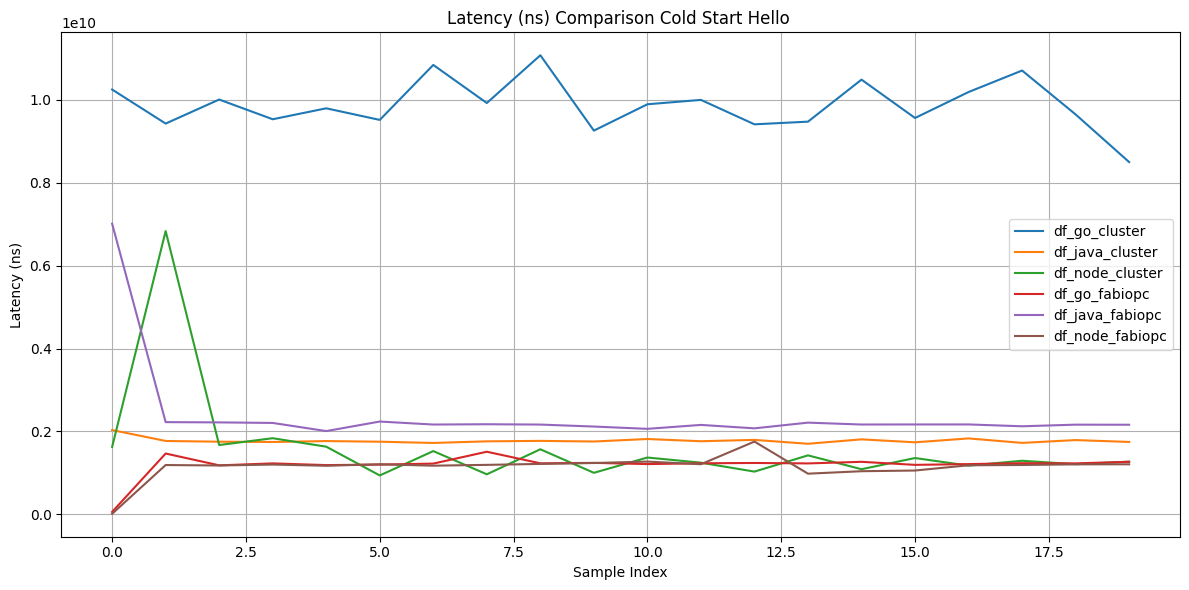

In [5]:

# Strip column names just in case (if you haven’t already)
for df in dfs.values():
    df.columns = df.columns.str.strip()

# Create the plot
plt.figure(figsize=(12, 6))

for name, df in dfs.items():
    plt.plot(df['latency_ns'].values, label=name)

plt.title('Latency (ns) Comparison Cold Start Hello ')
plt.xlabel('Sample Index')
plt.ylabel('Latency (ns)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


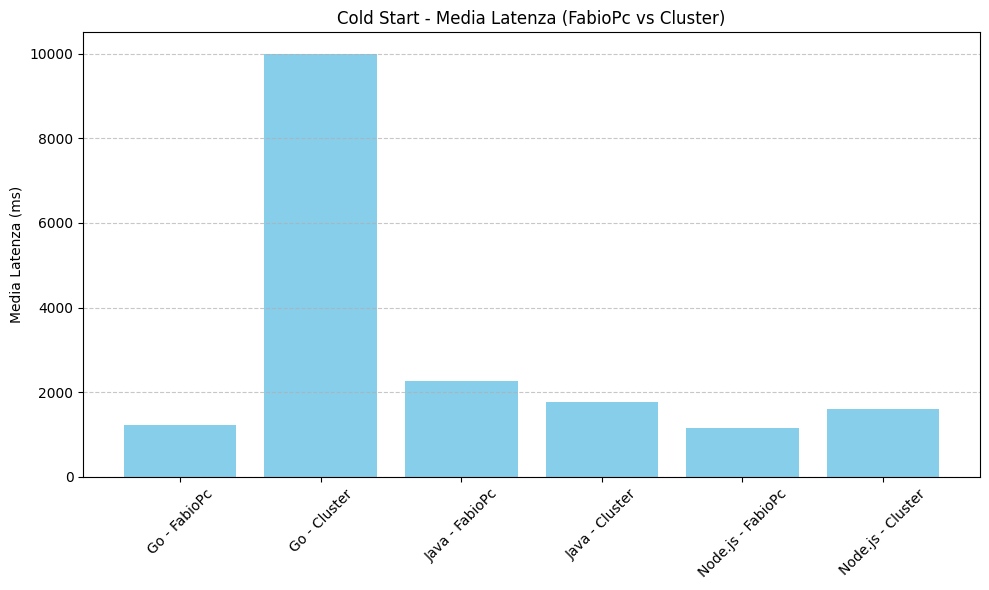

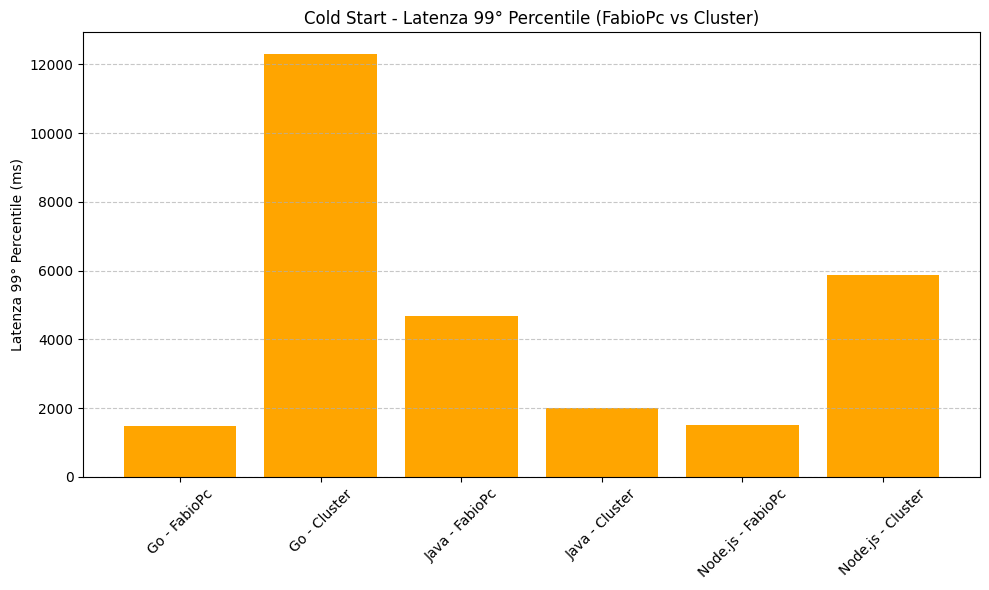

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Lettura CSV ===
df_go_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/goFolder/latency_go_hello_coldStart_50_FabioPc.csv', sep=';', index_col=0)
df_java_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/javaFolder/latency_javaQuarkus_hello_coldStart_50_FabioPc.csv', sep=';', index_col=0)
df_node_fabiopc = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Local/nodejsFolder/latency_js_hello_coldStart_50_FabioPc.csv', sep=';', index_col=0)
df_go_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/go/latency_go_hello_coldStart_50_Cluster.csv', sep=';', index_col=0)
df_node_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/node/latency_node_hello_coldStart_20_Cluster.csv', sep=';', index_col=0)
df_java_cluster = pd.read_csv('/home/fabioc/Documents/serverlessExperiment/loadTesting/Analysis/CommonValues/Cluster/quarkus/latency_quarkus_hello_coldStart_20_Cluster.csv', sep=';', index_col=0)

# === Pulisce i nomi delle colonne ===
dataframes = [df_go_fabiopc, df_java_fabiopc, df_node_fabiopc, df_go_cluster, df_java_cluster, df_node_cluster]
for df in dataframes:
    df.columns = df.columns.str.strip()

# === Calcolo media ===
means = {
    'Go - FabioPc': df_go_fabiopc['latency_ms'].mean(),
    'Go - Cluster': df_go_cluster['latency_ms'].mean(),
    'Java - FabioPc': df_java_fabiopc['latency_ms'].mean(),
    'Java - Cluster': df_java_cluster['latency_ms'].mean(),
    'Node.js - FabioPc': df_node_fabiopc['latency_ms'].mean(),
    'Node.js - Cluster': df_node_cluster['latency_ms'].mean()
}

# === Calcolo 99° percentile ===
percentiles_99 = {
    'Go - FabioPc': np.percentile(df_go_fabiopc['latency_ms'], 99),
    'Go - Cluster': np.percentile(df_go_cluster['latency_ms'], 99),
    'Java - FabioPc': np.percentile(df_java_fabiopc['latency_ms'], 99),
    'Java - Cluster': np.percentile(df_java_cluster['latency_ms'], 99),
    'Node.js - FabioPc': np.percentile(df_node_fabiopc['latency_ms'], 99),
    'Node.js - Cluster': np.percentile(df_node_cluster['latency_ms'], 99)
}

# === Grafico: Media ===
plt.figure(figsize=(10, 6))
plt.bar(means.keys(), means.values(), color='skyblue')
plt.ylabel('Media Latenza (ms)')
plt.title('Cold Start - Media Latenza (FabioPc vs Cluster)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Grafico: 99° Percentile ===
plt.figure(figsize=(10, 6))
plt.bar(percentiles_99.keys(), percentiles_99.values(), color='orange')
plt.ylabel('Latenza 99° Percentile (ms)')
plt.title('Cold Start - Latenza 99° Percentile (FabioPc vs Cluster)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
print(df_java_cluster.columns)


Index(['latency_ns', 'latency_ms', 'Unnamed: 3'], dtype='object')
